# <center>Тема 2. Визуальный анализ данных
## <center>Практическое задание. Визуальный анализ данных по пассажирам "Титаника".

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

**Считываем обучающую выборку.**

In [2]:
train_df = pd.read_csv("../data/titanic_train.csv", 
                       index_col='PassengerId') 

In [3]:
train_df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
train_df.describe(include='all')

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,"Braund, Mr. Owen Harris",male,NaN,NaN,NaN,347082,NaN,B96 B98,S
freq,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


In [5]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


**Выкинем признак `Cabin`, а потом – все строки, где есть пропуски.**

In [6]:
train_df = train_df.drop('Cabin', axis=1).dropna()

**Постройте попарные зависимости признаков `Age`, `Fare`, `Pclass`, `Sex`, `SibSp`, `Parch`, `Embarked` и `Survived`. (метод `scatter_matrix ` Pandas или `pairplot` Seaborn).**

c:\Users\akmur\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


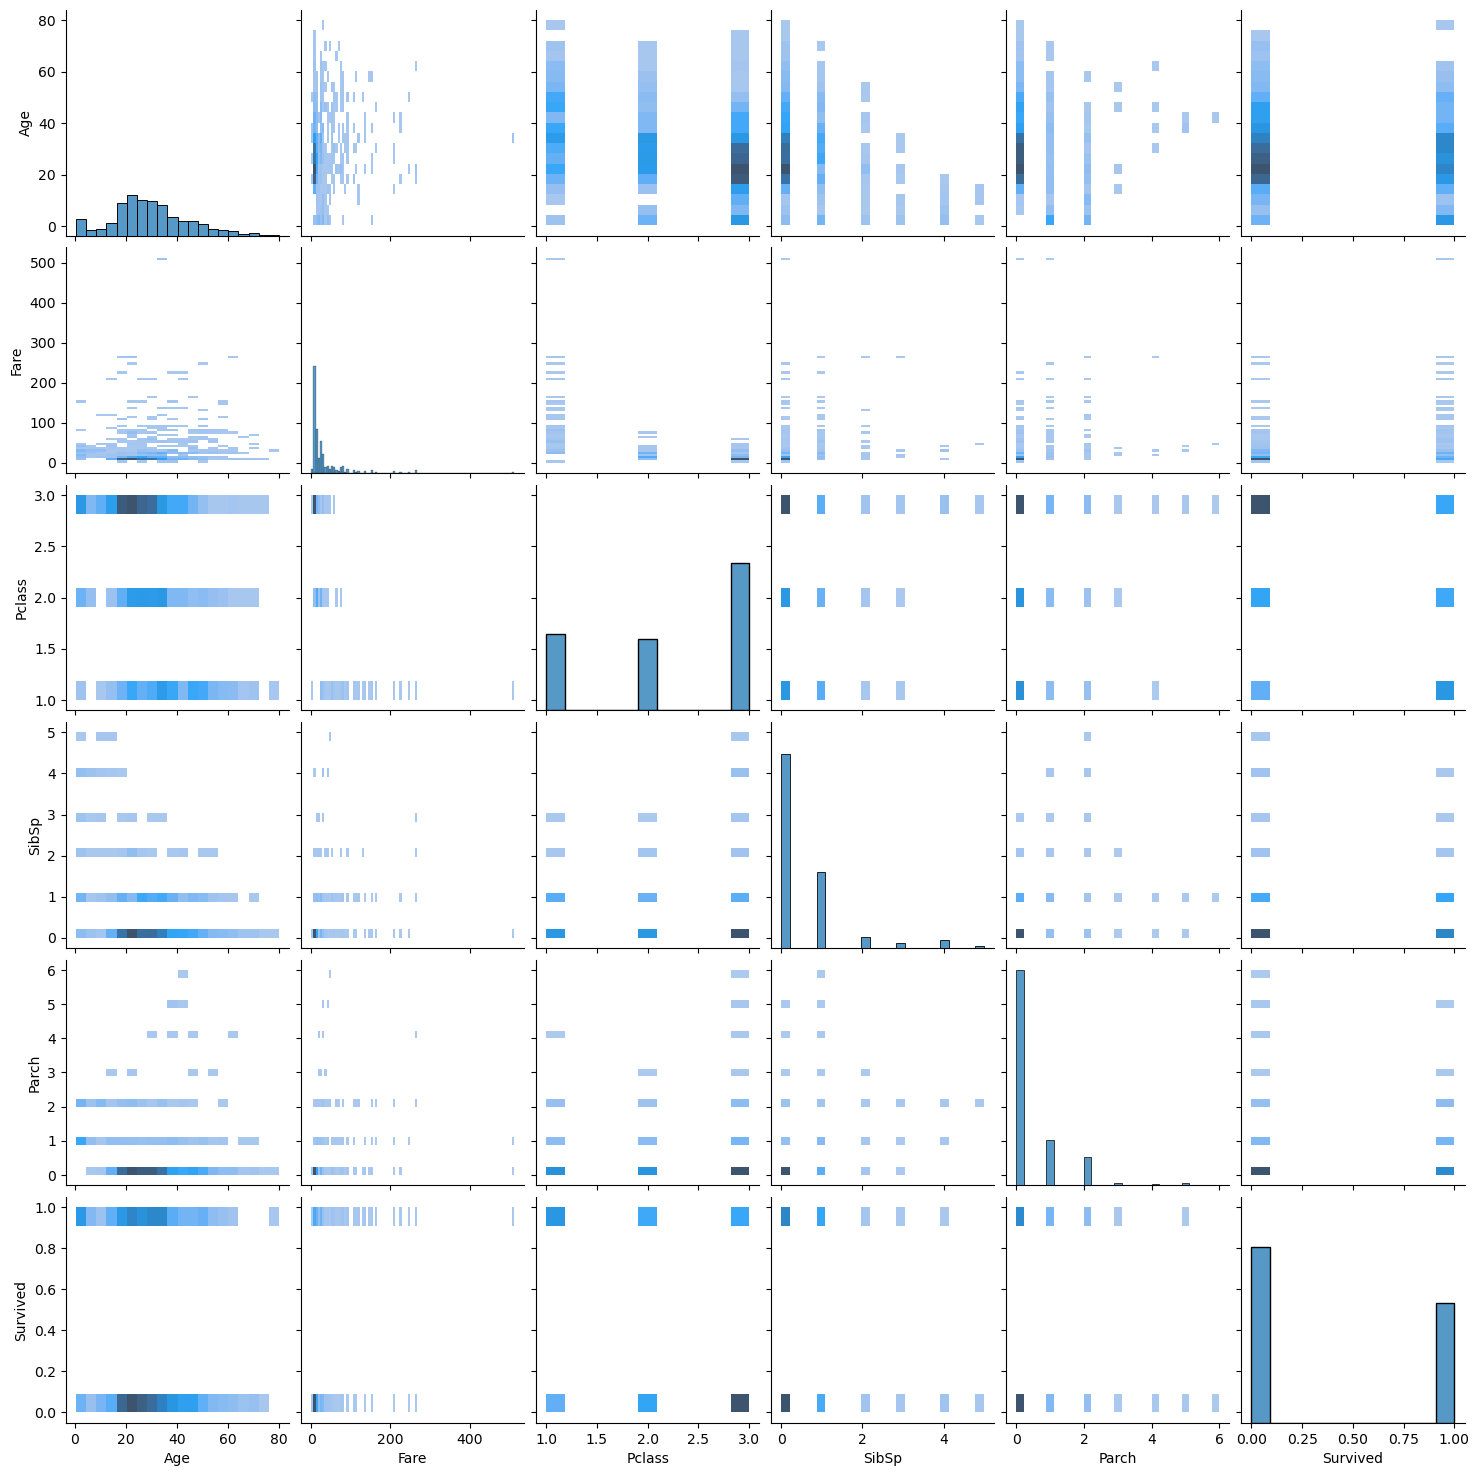

In [7]:
key=['Age','Fare','Pclass','SibSp','Parch','Embarked','Survived','Sex']
sex_dict={'male':0,'female':1}

#train_df.Sex=[sex_dict[x] for x in train_df.Sex]

%config InlineBackend.figure_format = 'png' 
sns.pairplot(train_df[key], kind='hist')

**Как плата за билет (`Fare`) зависит от класса каюты (`Pclass`)? Постройте boxplot.**

In [8]:
pd.crosstab(train_df.Pclass,train_df.Fare)

Fare,0.0000,4.0125,5.0000,6.2375,6.4375,6.4500,6.4958,6.7500,6.9750,7.0458,...,151.5500,153.4625,164.8667,211.3375,211.5000,227.5250,247.5208,262.3750,263.0000,512.3292
Pclass,,,,,,,,,,,,,,,,,,,,,
1,3,0,1,0,0,0,0,0,0,0,...,4,3,2,3,1,3,2,2,4,3
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,1,0,1,1,1,2,2,2,1,...,0,0,0,0,0,0,0,0,0,0


<Axes: xlabel='Pclass', ylabel='Fare'>

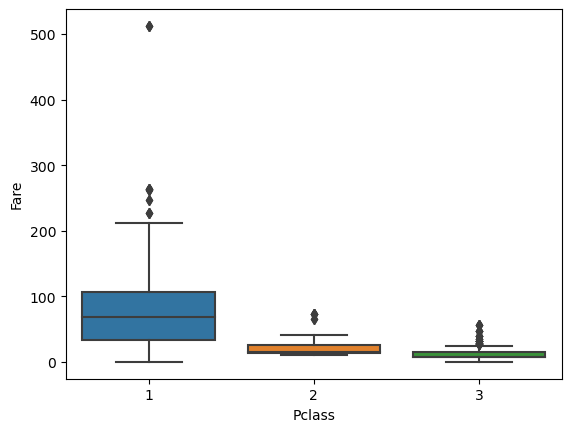

In [9]:
sns.boxplot(x='Pclass',y='Fare',data=train_df)

**Такой boxplot получается не очень красивым из-за выбросов.** 

**Опционально: создайте признак `Fare_no_out` (стоимости без выбросов), в котором исключаются стоимости, отличающиеся от средней по классу более чем на 2 стандартных отклонения. Важно: надо исключать выбросы именно в зависимости от класса каюты. Иначе исключаться будут только самые большие (1 класс) и малые (3 класс) стоимости.**

In [10]:
fare_pclass1 = train_df[train_df['Pclass'] == 1]['Fare']
fare_pclass1 = fare_pclass1.sort_values(ascending=False)
fare_pclass1.describe()

count    184.000000
mean      88.048121
std       81.293524
min        0.000000
25%       33.890600
50%       67.950000
75%      107.043750
max      512.329200
Name: Fare, dtype: float64

<Axes: >

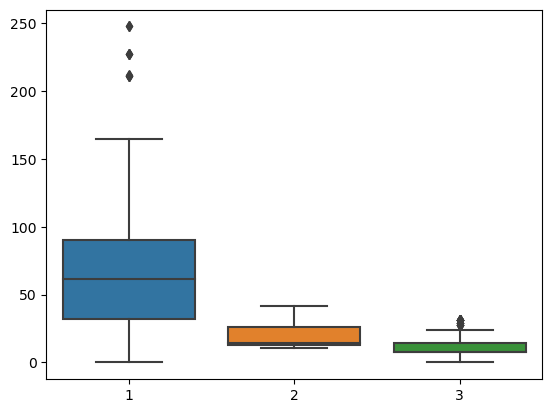

In [11]:

fare_pclass1 = train_df[train_df['Pclass'] == 1]['Fare']
fare_pclass2 = train_df[train_df['Pclass'] == 2]['Fare']
fare_pclass3 = train_df[train_df['Pclass'] == 3]['Fare']
fare_pclass1_no_out = pd.Series([x for x in fare_pclass1 if abs(x-fare_pclass1.mean())<= fare_pclass1.std()*2])
fare_pclass2_no_out = pd.Series([x for x in fare_pclass2 if abs(x-fare_pclass2.mean())<= fare_pclass2.std()*2])
fare_pclass3_no_out = pd.Series([x for x in fare_pclass3 if abs(x-fare_pclass3.mean())<= fare_pclass3.std()*2])

fare_no_out = pd.DataFrame({
    '1': fare_pclass1_no_out,
    '2': fare_pclass2_no_out,
    '3': fare_pclass3_no_out
})

sns.boxplot(data=fare_no_out)

**Каково соотношение погибших и выживших в зависимости от пола? Отобразите c помощью Seaborn.countplot c аргументом hue.**

In [12]:
pd.crosstab(train_df.Survived,train_df.Sex)

Sex,female,male
Survived,,
0,64,360
1,195,93


<Axes: xlabel='Survived', ylabel='count'>

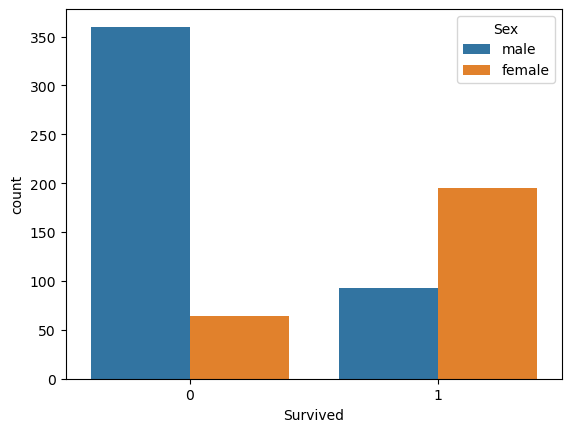

In [13]:
sns.countplot(x='Survived',hue='Sex',data=train_df)

**Каково соотношение погибших и выживших в зависимости от класса каюты? Отобразите c помощью Seaborn.countplot c аргументом hue.**

In [14]:
pd.crosstab(train_df.Survived,train_df.Pclass)

Pclass,1,2,3
Survived,,,
0,64,90,270
1,120,83,85


<Axes: xlabel='Pclass', ylabel='count'>

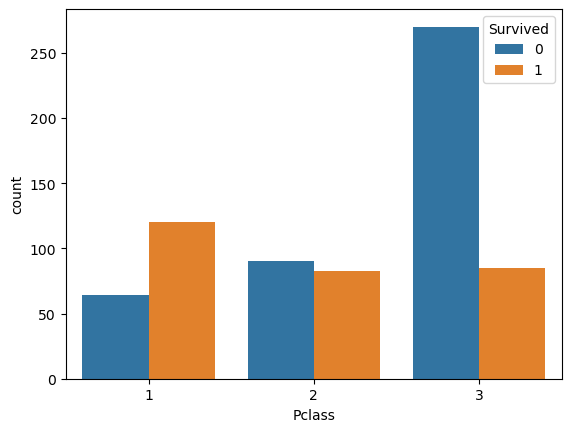

In [15]:
sns.countplot(x='Pclass',hue='Survived',data=train_df)

**Как факт выживания зависит от возраста пассажира? Проверьте (графически) предположение, что молодые чаще выживали. Пусть, условно, молодые - младше 30 лет, пожилые – старше 60 лет.**

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51]),
 [Text(0, 0, '0.42'),
  Text(1, 0, '0.67'),
  Text(2, 0, '0.75'),
  Text(3, 0, '0.83'),
  Text(4, 0, '0.92'),
  Text(5, 0, '1.0'),
  Text(6, 0, '2.0'),
  Text(7, 0, '3.0'),
  Text(8, 0, '4.0'),
  Text(9, 0, '5.0'),
  Text(10, 0, '6.0'),
  Text(11, 0, '7.0'),
  Text(12, 0, '8.0'),
  Text(13, 0, '9.0'),
  Text(14, 0, '10.0'),
  Text(15, 0, '11.0'),
  Text(16, 0, '12.0'),
  Text(17, 0, '13.0'),
  Text(18, 0, '14.0'),
  Text(19, 0, '14.5'),
  Text(20, 0, '15.0'),
  Text(21, 0, '16.0'),
  Text(22, 0, '17.0'),
  Text(23, 0, '18.0'),
  Text(24, 0, '19.0'),
  Text(25, 0, '20.0'),
  Text(26, 0, '20.5'),
  Text(27, 0, '21.0'),
  Text(28, 0, '22.0'),
  Text(29, 0, '23.0'),
  Text(30, 0, '23.5'),
  Text(31, 0, '24.0'),
  Text(32, 0, '24.5'),
  Text(33, 0, '25.

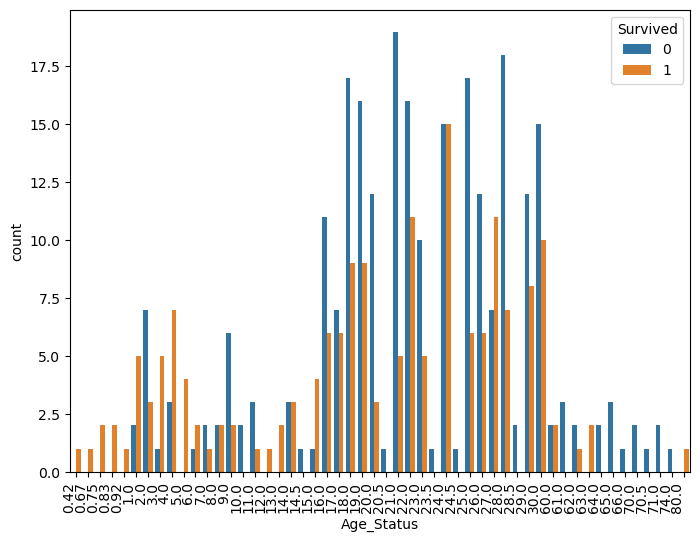

In [16]:
train_df['Age_Status']=train_df['Age']


train_df.loc[(train_df['Age'] > 30) & (train_df['Age'] < 60), 'Age_Status'] = None 


plt.figure(figsize=(8, 6))
sns.countplot(x='Age_Status',hue='Survived',data=train_df)
plt.xticks(rotation=90, ha='right')

In [17]:
train_df.loc[(train_df['Age']<=30, 'Age_Status')]='young';
train_df.loc[(train_df['Age']>=60, 'Age_Status')]='old';

<Axes: xlabel='Age_Status', ylabel='count'>

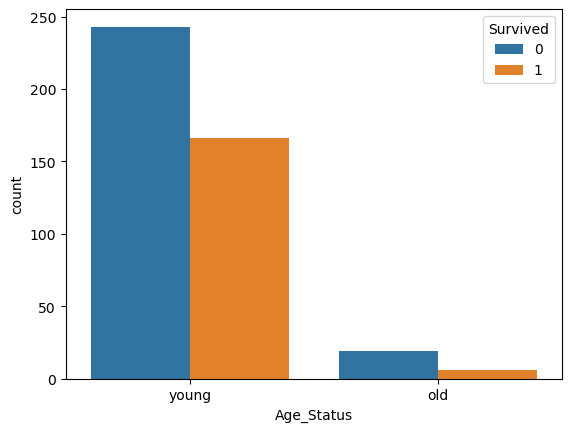

In [18]:
sns.countplot(x='Age_Status',hue='Survived',data=train_df)